Model, preprocessor, and scaler saved successfully!
Accuracy: 0.88

Confusion Matrix:
[[67  9]
 [ 8 63]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89        76
           1       0.88      0.89      0.88        71

    accuracy                           0.88       147
   macro avg       0.88      0.88      0.88       147
weighted avg       0.88      0.88      0.88       147



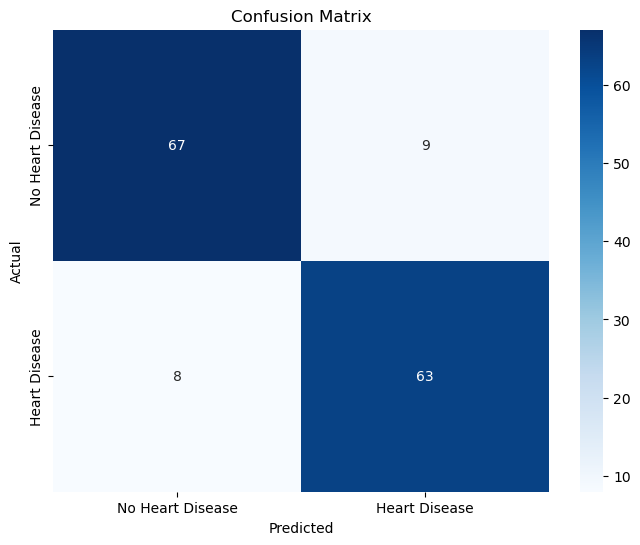

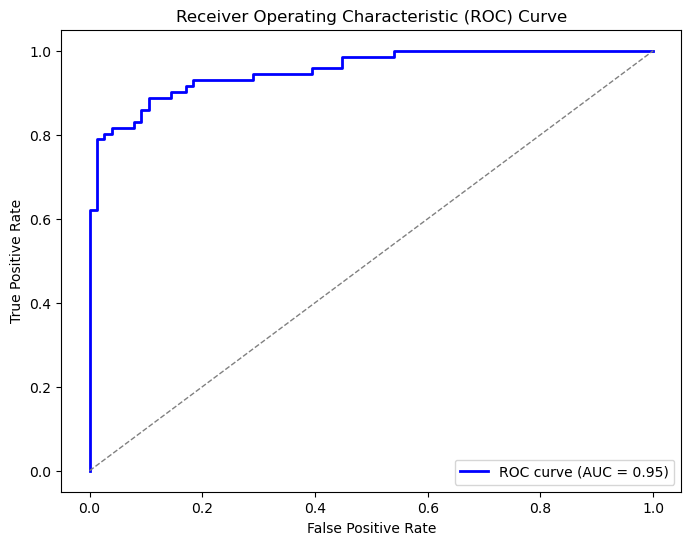

In [1]:
#import required libraries
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from joblib import dump 
#Load csv file

df=pd.read_csv('../../heart.csv')
#Group age and  cholestrolLevels based on distribution
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 40, 60, 100], labels=['Young', 'Middle', 'Old'])
df['CholesterolLevel'] = pd.cut(df['Cholesterol'], bins=[0, 200, 240, 400], labels=['Normal', 'Borderline', 'High'])

#drop NAN values
df = df.dropna()
categorical_features = ['Sex', 'ChestPainType', 'RestingECG',  'ExerciseAngina','ST_Slope', 'AgeGroup', 'CholesterolLevel']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
#Split 20% data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

#dump the model 
dump(model, 'heart_disease_model.joblib')
dump(preprocessor, 'preprocessor.joblib')
dump(scaler, 'scaler.joblib')
print("Model, preprocessor, and scaler saved successfully!")
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# visulalize model results and accuracy
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()